# Setup
Let’s start by importing the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython import display
from IPython.display import Image
import ipywidgets as widgets
import threading
import time

In [9]:
W = np.load("model.npy")
print(W.shape)
W = W[:,:784]
print(W.shape)


(10, 785)
(10, 784)


In [10]:
def imageToVector(image):
    x = image.reshape(image.shape[0]*image.shape[1])
    return x

def applyModel(image) :
    x = imageToVector(image)
    dot = W@x
    y_pred = np.argmax(dot)
    return y_pred

# Display the webcam in OpenCV’s own window
To start, here’s the standard way of displaying the webcam feed with OpenCV. It will open a separate window.

In [11]:
# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)

def crop_image(result, image):
    assert result == True
    # print (result, image.shape)
    image_cropped = image[:,int(image.shape[1]/2-image.shape[0]/2) : int(image.shape[1]/2+image.shape[0]/2)]
    # print (image_cropped.shape)
    return image_cropped

def convert_to_mnist(image):
    shape = image.shape # need to convert it to 28 x 28 x 255
    resized_image = cv2.resize(image, (28, 28)) 
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    inverted = 255 - gray
    # print(gray.shape)
    # print (gray)
    return inverted.astype(np.float32) / 255.0

# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display.display(None, display_id=True)
    i = 0

    while True:
        try:
            result, frame = cap.read()
            cropped_frame = crop_image(result, frame)
            mnist_format = convert_to_mnist(cropped_frame)

            y_pred = applyModel(mnist_format)

            frame = cv2.flip(mnist_format, 1) # if your camera reverses your image
            
            _, frame = cv2.imencode('.jpeg', cropped_frame)         #converts (encodes) image formats into streaming data and stores it in-memory cache
            display.display(stopButton)
            display.display(Image(data=frame.tobytes()))
            print("label = ", y_pred)
            display.clear_output(wait=True)
            time.sleep(1.0)
            
            if stopButton.value==True:
                cap.release()
                display_handle.update(None)
                break
        except KeyboardInterrupt:
            cap.release()
            display_handle.update(None)
            break
  

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

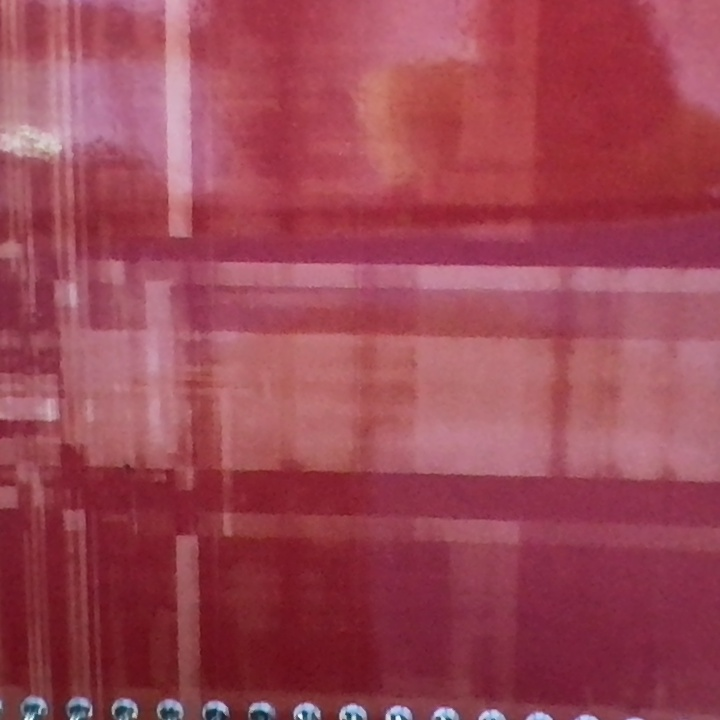

label =  8


In [24]:
# Run
# ================
# display.display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

<span style="color:SteelBlue"> Exercise 1</span> : Convert the camera image to the format we used for the model training! It has to have 28x28 pixels, their values need to range from 0 to 255 (the GrayScale convention)
- Make sure the white color corresponds to 0 intensity!

<span style="color:SteelBlue"> Exercise 2</span> : Save and load your model (the trained matrix W)
- use np.save()
- use np.load()

<span style="color:SteelBlue"> Exercise 3</span> : Apply your model (the trained matrix W) to the camera image!